In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [25]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db, table_name))

life_df = pd.read_sql_query('select * from lifeexpectancy',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [26]:
life_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [27]:
life_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [28]:
life_df.isnull().sum()/life_df.isnull().count()

Country                            0.000000
Year                               0.000000
Status                             0.000000
Life expectancy                    0.003404
Adult Mortality                    0.003404
infant deaths                      0.000000
Alcohol                            0.066031
percentage expenditure             0.000000
Hepatitis B                        0.188223
Measles                            0.000000
 BMI                               0.011572
under-five deaths                  0.000000
Polio                              0.006467
Total expenditure                  0.076923
Diphtheria                         0.006467
 HIV/AIDS                          0.000000
GDP                                0.152485
Population                         0.221920
 thinness  1-19 years              0.011572
 thinness 5-9 years                0.011572
Income composition of resources    0.056841
Schooling                          0.055480
dtype: float64

We can see that there are missing values in this dataset.

In [29]:
fill_list = ["Life expectancy", "Adult Mortality", "infant deaths", "Alcohol", "percentage expenditure",
             "Hepatitis B", "Measles", "BMI", "under-five deaths", "Polio", "Total expenditure", "Diphtheria", "HIV/AIDS", "GDP",
             "Population", "thinness  1-19 years", "thinness 5-9 years", "Income composition of resources", "Schooling"]

life1_df = life_df.copy()

years = life1_df["Year"].unique()

for col in fill_list:
    for year in years:
        life1_df.loc[life1_df["Year"] == year, col].fillna(
           life1_df[life1_df["Year"] == year][col].mean(), inplace=True)

KeyError: 'the label [Life expectancy] is not in the [columns]'

In [21]:
life2_df = life_df.copy()

for col in fill_list:
    life2_df.loc[:, col].interpolate(inplace=True)

KeyError: 'the label [Life expectancy] is not in the [columns]'

KeyError: 'Life expectancy'

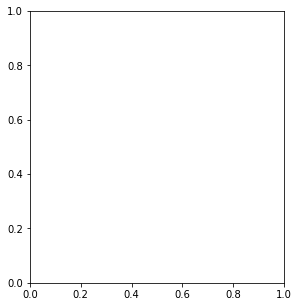

In [23]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.boxplot(life_df["Life expectancy"], whis = 5)
plt.title("Box plot of Life expectancy")

plt.subplot(1,2,2)
plt.boxplot(life_df["Adult Mortality"], whis = 5)
plt.title("Box plot of Adult Mortality")
plt.show()

In [ ]:
from scipy.stats.mstats import winsorize

w_revenue = winsorize(education_df["TOTAL_REVENUE"], (0, 0.05))

w_expenditure = winsorize(education_df["TOTAL_EXPENDITURE"], (0, 0.05))